In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('uber.csv')

In [8]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

In [13]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [21]:
def remove_out(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    
    low=q1-1.5*(iqr)
    hig=q3+1.5*(iqr)
    
    df[col]=np.clip(data[col],low, hig)
    return data

Unnamed: 0              Axes(0.125,0.786098;0.352273x0.0939024)
fare_amount          Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_longitude        Axes(0.125,0.673415;0.352273x0.0939024)
pickup_latitude      Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_longitude       Axes(0.125,0.560732;0.352273x0.0939024)
dropoff_latitude     Axes(0.547727,0.560732;0.352273x0.0939024)
passenger_count         Axes(0.125,0.448049;0.352273x0.0939024)
dtype: object

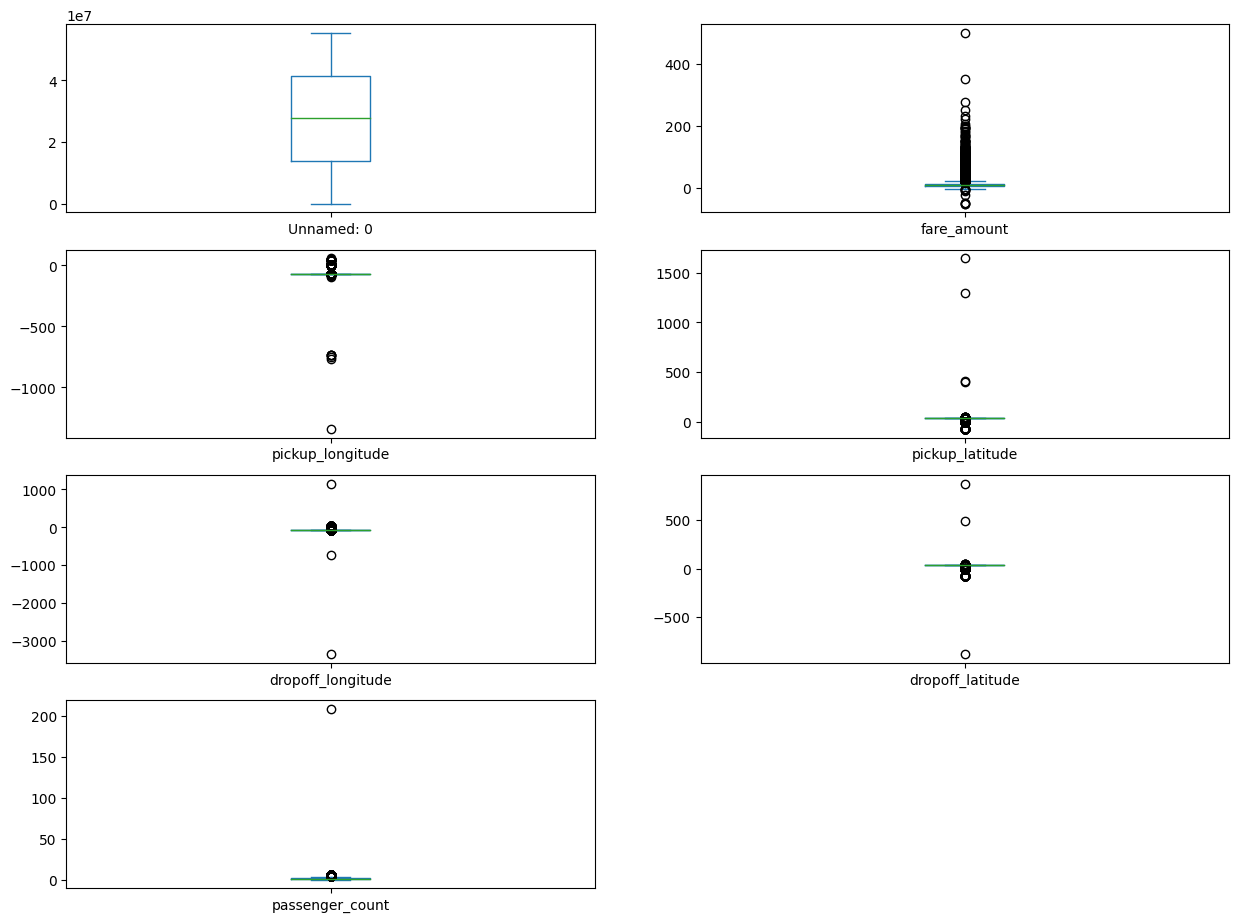

In [22]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [23]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [27]:
col_ls=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

In [28]:
col_ls

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [29]:
for i in col_ls:
    df=remove_out(df,i)

Unnamed: 0              Axes(0.125,0.786098;0.352273x0.0939024)
fare_amount          Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_longitude        Axes(0.125,0.673415;0.352273x0.0939024)
pickup_latitude      Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_longitude       Axes(0.125,0.560732;0.352273x0.0939024)
dropoff_latitude     Axes(0.547727,0.560732;0.352273x0.0939024)
passenger_count         Axes(0.125,0.448049;0.352273x0.0939024)
dtype: object

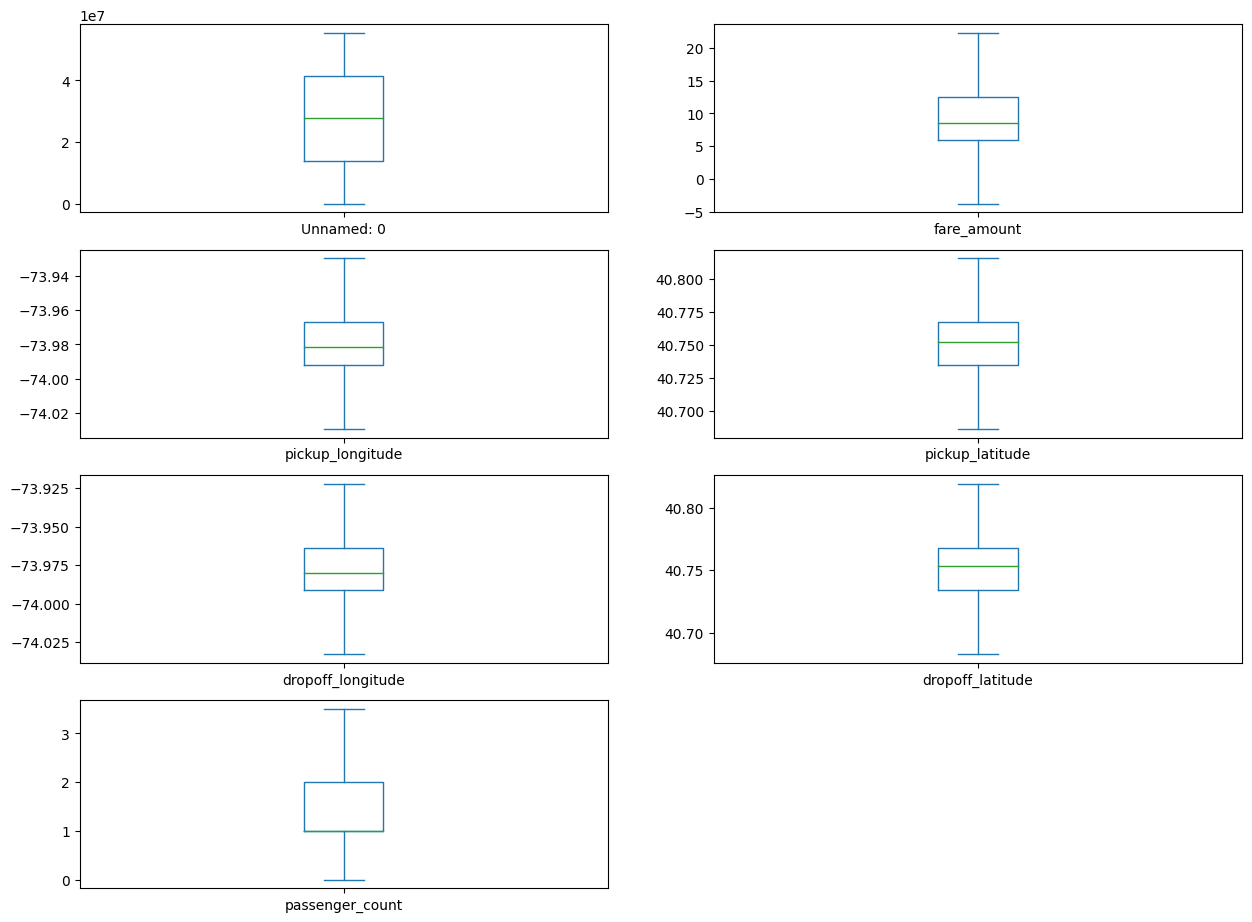

In [30]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [31]:
import haversine as hs

In [32]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.929786,40.744085,-73.973082,40.761247,3.5


In [33]:
travel_dist=[]
for i in range(len(df['pickup_longitude'])):
    lon1,lat1,lon2,lat2=df['pickup_longitude'][i],df['pickup_latitude'][i],df['dropoff_longitude'][i],df['dropoff_latitude'][i]
    c=hs.haversine((lat1,lon2),(lat2,lon2))
    travel_dist.append(c)
travel_dist

[1.6831286558786445,
 2.4574112731604716,
 3.544565572603926,
 1.3904944783203188,
 1.9083299669677016,
 0.0,
 8.932523185319164,
 0.4110419154058329,
 0.2479650289208818,
 3.6944565407586603,
 1.9066691804888478,
 0.4110419154058329,
 0.2994483510688634,
 3.1974145321158236,
 1.2433833871710975,
 0.8550901669958884,
 0.3411465061565064,
 0.911799657914998,
 1.4820694364011533,
 0.8642081635743099,
 1.5208151123543756,
 0.9459115177945098,
 1.2583947230032713,
 1.6712620559089393,
 5.453785100214184,
 2.6053007298715762,
 0.7225456313575628,
 3.189186096177836,
 1.035226196974195,
 0.3926298283051953,
 10.428027517536805,
 1.3484627379920708,
 0.21594084581290426,
 2.772982910863997,
 4.419406765726232,
 1.4866782227228026,
 0.8819993764119965,
 2.1191558390908587,
 2.064336664535413,
 7.007513956316972,
 4.82631126245591,
 1.0857087634003617,
 0.1338788766007454,
 0.7658005175682646,
 0.2994483510688634,
 2.3684552089734527,
 0.9647285161060726,
 3.707294468845665,
 0.0,
 3.9176250667

In [34]:
df['travel_dist']=travel_dist

In [35]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,travel_dist
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683129
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457411
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,3.544566
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.390494
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.929786,40.744085,-73.973082,40.761247,3.5,1.908330


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [38]:
x=df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','travel_dist']]

In [39]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,travel_dist
0,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683129
1,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457411
2,-74.005043,40.740770,-73.962565,40.772647,1.0,3.544566
3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.390494
4,-73.929786,40.744085,-73.973082,40.761247,3.5,1.908330


In [40]:
y=df['fare_amount']

In [41]:
y.head()

0     7.5
1     7.7
2    12.9
3     5.3
4    16.0
Name: fare_amount, dtype: float64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
model=LinearRegression()


In [44]:
model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)

In [47]:
acc

0.49580021206769587